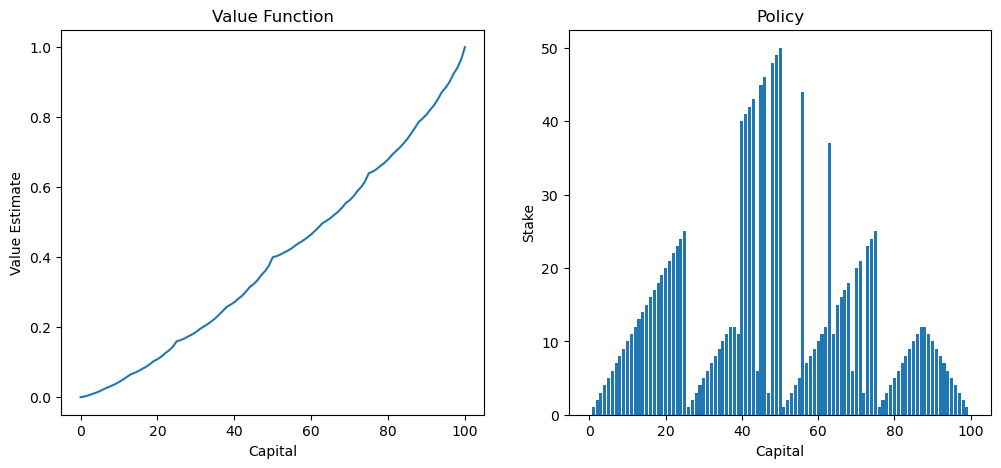

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gambler_value_iteration(p_h=0.4, theta=1e-9, gamma=1.0):
    goal = 100
    V = np.zeros(goal + 1)
    V[goal] = 1.0  # Terminal state
    policy = np.zeros(goal + 1)
    
    while True:
        delta = 0
        for s in range(1, goal):
            actions = range(1, min(s, goal - s) + 1)
            action_returns = [p_h * gamma * V[s + a] + (1 - p_h) * gamma * V[s - a] for a in actions]
            new_value = max(action_returns)
            delta = max(delta, abs(new_value - V[s]))
            V[s] = new_value
        if delta < theta:
            break
    
    for s in range(1, goal):
        actions = range(1, min(s, goal - s) + 1)
        action_returns = [p_h * gamma * V[s + a] + (1 - p_h) * gamma * V[s - a] for a in actions]
        policy[s] = actions[np.argmax(action_returns)]
    
    return V, policy

def plot_results(V, policy):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.xlabel('Capital')
    plt.ylabel('Value Estimate')
    plt.title('Value Function')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(len(policy)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.title('Policy')
    
    plt.show()

def main():
    V, policy = gambler_value_iteration()
    plot_results(V, policy)

if __name__ == "__main__":
    main()
